In [674]:
import pandas as pd
import numpy as np
import matplotlib
import os
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
%matplotlib inline

In [675]:
def figure_for_scatter():
    f = plt.figure(figsize=(12, 12))

In [676]:
print "Current working directory: "+os.getcwd()

Current working directory: D:\Git\TokenRing\research


In [677]:
column_names = ["sen", "rec", "ret", "cir", "top","tok","mess","rush","sil","s_m","s_n","er", "nans"]
path_to_meta = os.getcwd()+"\\results.txt"

In [678]:
data = pd.read_table(path_to_meta, sep=' ', names=column_names)
data = data.drop(data.index[0])
data = data.drop("nans", axis=1)
data["sen"].apply(pd.to_numeric, errors='coerce')
data.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,124800927.0,125303824.0,125651212.0,763940.0,7,1,1000,true,true,10,10,false
2,63349476.0,63723861.0,64104492.0,769295.0,7,2,1000,true,true,10,10,false
3,43144774.5,43582300.0,44002422.0,778666.0,7,3,1000,true,true,10,10,false
4,35802782.0,36256148.0,36769086.5,760370.5,7,4,1000,true,true,10,10,false
5,24678125.5,25104049.0,25426671.0,692767.0,7,5,1000,true,true,10,10,false


In [679]:
cols_numeric = ["sen", "rec", "ret", "cir", "top","tok","mess","s_m","s_n"]
data[cols_numeric] = data[cols_numeric].apply(pd.to_numeric, errors='coerce', axis=1)

In [680]:
d = {'true': True, 'false': False}

In [681]:
for col in ["rush","sil", "er"]:
    data[col] = data[col].map(d)
data.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,124800927.0,125303824.0,125651212.0,763940.0,7.0,1.0,1000.0,True,True,10.0,10.0,False
2,63349476.0,63723861.0,64104492.0,769295.0,7.0,2.0,1000.0,True,True,10.0,10.0,False
3,43144774.5,43582300.0,44002422.0,778666.0,7.0,3.0,1000.0,True,True,10.0,10.0,False
4,35802782.0,36256148.0,36769086.5,760370.5,7.0,4.0,1000.0,True,True,10.0,10.0,False
5,24678125.5,25104049.0,25426671.0,692767.0,7.0,5.0,1000.0,True,True,10.0,10.0,False


## Plots

In [682]:
data.to_csv("data_hw2.csv", index= True, sep=" ", encoding= "utf_8")

In [683]:
rush_early = data.loc[np.logical_and(data.er == 1, data.rush == 1)]
rush_early_1toc = rush_early.loc[np.logical_and(rush_early.tok == 1, True)]
rush_early_5toc = rush_early.loc[np.logical_and(rush_early.tok == 5, True)]
rush_early_15toc = rush_early.loc[np.logical_and(rush_early.tok == 15, True)]
rush_early_30nodes = rush_early.loc[np.logical_and(rush_early.top == 30, True)]
rush_early_15nodes = rush_early.loc[np.logical_and(rush_early.top == 15, True)]
rush_early_5nodes = rush_early.loc[np.logical_and(rush_early.top == 5, True)]
rush_early_1toc.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
465,746091.5,755239.0,761263.0,14280.0,2.0,1.0,1000.0,True,True,10.0,10.0,True
467,1752332.5,1779775.0,1798294.0,45069.0,3.0,1.0,1000.0,True,True,10.0,10.0,True
470,8141853.5,8244709.5,8367867.5,179829.0,4.0,1.0,1000.0,True,True,10.0,10.0,True
474,9201865.5,9365853.5,9482765.5,275991.5,5.0,1.0,1000.0,True,True,10.0,10.0,True
479,29979746.0,30436236.0,30894065.0,852293.0,6.0,1.0,1000.0,True,True,10.0,10.0,True


In [684]:
rush_noearly = data.loc[np.logical_and(data.er == 0, data.rush == 1)]
rush_noearly_1toc = rush_noearly.loc[np.logical_and(rush_noearly.tok == 1, True)]
rush_noearly_5toc = rush_noearly.loc[np.logical_and(rush_noearly.tok == 5, True)]
rush_noearly_15toc = rush_noearly.loc[np.logical_and(rush_noearly.tok == 15, True)]
rush_noearly_30nodes = rush_noearly.loc[np.logical_and(rush_noearly.top == 30, True)]
rush_noearly_15nodes = rush_noearly.loc[np.logical_and(rush_noearly.top == 15, True)]
rush_noearly_5nodes = rush_noearly.loc[np.logical_and(rush_noearly.top == 5, True)]
rush_noearly_1toc.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,124800927.0,125303824.0,125651212.0,763940.0,7.0,1.0,1000.0,True,True,10.0,10.0,False
8,165679538.5,166090514.0,166602112.5,857871.0,8.0,1.0,1000.0,True,True,10.0,10.0,False
16,180284541.5,180763788.5,181189043.0,929490.0,9.0,1.0,1000.0,True,True,10.0,10.0,False
25,263494232.5,264036175.0,264616047.0,1181608.0,10.0,1.0,1000.0,True,True,10.0,10.0,False
35,345892014.0,346610886.0,347303653.0,1389550.0,11.0,1.0,1000.0,True,True,10.0,10.0,False


In [685]:
norush_early = data.loc[np.logical_and(data.er == 1, data.rush == 0)]
norush_early_1toc = norush_early.loc[np.logical_and(norush_early.tok == 1, True)]
norush_early_5toc = norush_early.loc[np.logical_and(norush_early.tok == 5, True)]
norush_early_15toc = norush_early.loc[np.logical_and(norush_early.tok == 15, True)]
norush_early_30nodes = norush_early.loc[np.logical_and(norush_early.top == 30, True)]
norush_early_15nodes = norush_early.loc[np.logical_and(norush_early.top == 15, True)]
norush_early_5nodes = norush_early.loc[np.logical_and(norush_early.top == 5, True)]
norush_early_1toc.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
929,20080.0,29451.0,40607.0,14279.0,2.0,1.0,1000.0,False,True,10.0,10.0,True
931,37929.0,61356.5,82106.0,33690.0,3.0,1.0,1000.0,False,True,10.0,10.0,True
933,99508.5,178937.0,258365.0,137437.5,4.0,1.0,1000.0,False,True,10.0,10.0,True
937,268852.0,519408.0,720656.0,370368.0,5.0,1.0,1000.0,False,True,10.0,10.0,True
942,176259.5,358320.0,545958.0,340025.0,6.0,1.0,1000.0,False,True,10.0,10.0,True


In [686]:
norush_noearly = data.loc[np.logical_and(data.er == 0, data.rush == 0)]
norush_noearly_1toc = norush_noearly.loc[np.logical_and(norush_noearly.tok == 1, True)]
norush_noearly_5toc = norush_noearly.loc[np.logical_and(norush_noearly.tok == 5, True)]
norush_noearly_15toc = norush_noearly.loc[np.logical_and(norush_noearly.tok == 15, True)]
norush_noearly_30nodes = norush_noearly.loc[np.logical_and(norush_noearly.top == 30, True)]
norush_noearly_15nodes = norush_noearly.loc[np.logical_and(norush_noearly.top == 15, True)]
norush_noearly_5nodes = norush_noearly.loc[np.logical_and(norush_noearly.top == 5, True)]
norush_noearly.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1393,9.745595e+05,3.632286e+06,5.590329e+06,4414968.0,22.0,10.0,1000.0,False,True,10.0,10.0,False
1394,4.765700e+05,2.975886e+06,5.204343e+06,4541250.0,22.0,20.0,1000.0,False,True,10.0,10.0,False
1395,7.007990e+05,3.346477e+06,5.627366e+06,4593905.0,22.0,21.0,1000.0,False,True,10.0,10.0,False
1396,4.741165e+05,2.880170e+06,5.273062e+06,4613539.0,22.0,22.0,1000.0,False,True,10.0,10.0,False
1397,1.739755e+09,1.742585e+09,1.744784e+09,4750084.0,23.0,1.0,1000.0,False,True,10.0,10.0,False


In [687]:
red_patch = mpatches.Patch(color='black', label='no rush, early')
yellow_patch = mpatches.Patch(color="#ff7f00", label='no rush, no early')
green_patch = mpatches.Patch(color="#4daf4a", label='rush, early')
blue_patch = mpatches.Patch(color="#377eb8", label='rush, no early')

## 1. Throughput(topology_size)

Рассмотрим случай одного токена, как классический

Общий график:

[]

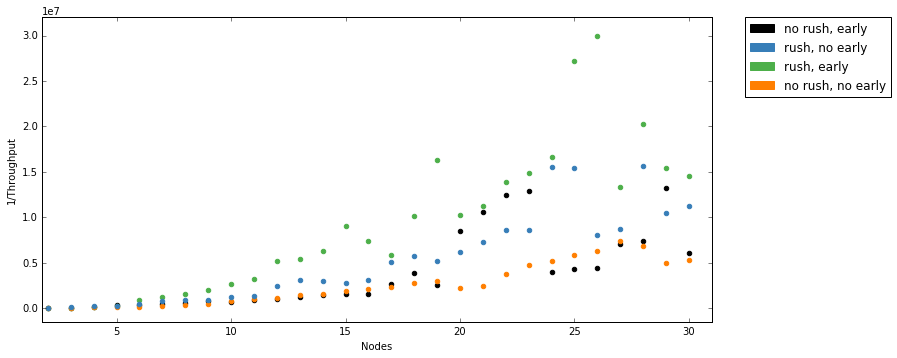

In [688]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("1/Throughput")
plt.scatter(norush_early_1toc["top"], norush_early_1toc["cir"]/norush_early_1toc["tok"], color="black")
plt.scatter(rush_early_1toc["top"], rush_early_1toc["cir"]/rush_early_1toc["tok"], color="#4daf4a")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["cir"]/norush_noearly_1toc["tok"], color="#ff7f00")
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["cir"]/rush_noearly_1toc["tok"], color="#377eb8")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.ylim(ymax=32000000, ymin = -1500000)
plt.xlim(xmax=31, xmin = 1.75)

plt.plot()

Как видим, уже после 18 нод значения становятся сильно зашумлены. Причём, в режимах rush-no early и no rush-early с учётом шума throughtput практически не различается. Однако видно, что худший throughput у rush-early режима, лучший - у no rush-no early. Этот интересный результат можно объяснить тем, что в режиме early-release для загруженной сети фреймов, перемещающихся в сегменте сети, может стать больше, чем нод, что приводит к локальным заторам.

Начало графика:

[]

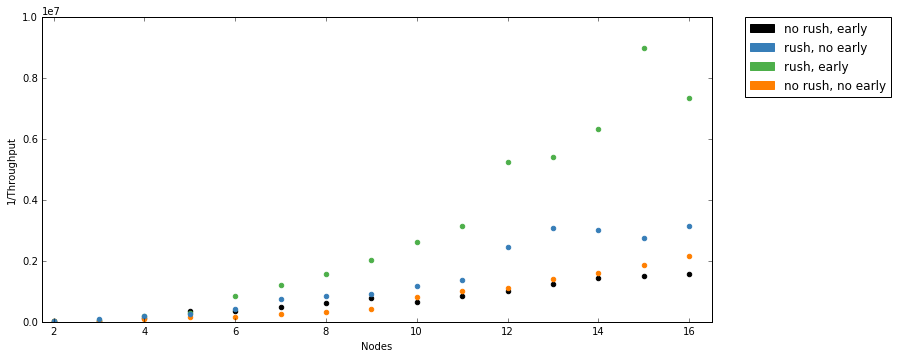

In [689]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("1/Throughput")
plt.scatter(norush_early_1toc["top"], norush_early_1toc["cir"]/norush_early_1toc["tok"], color="black")
plt.scatter(rush_early_1toc["top"], rush_early_1toc["cir"]/rush_early_1toc["tok"], color="#4daf4a")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["cir"]/norush_noearly_1toc["tok"], color="#ff7f00")
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["cir"]/rush_noearly_1toc["tok"], color="#377eb8")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.xlim(xmin=1.75, xmax = 16.5)
plt.ylim(ymin=-0.25, ymax = 10000000)

plt.plot()

Как видим, в начале графика ситуация несколько иная. На этом участке throughtput в режиме rush-no early явно хуже, чем в режиме no rush-early.

[]

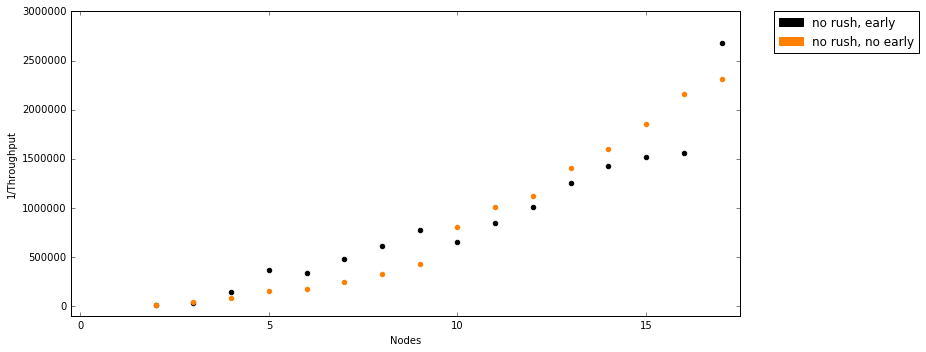

In [690]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("1/Throughput")
plt.scatter(norush_early_1toc["top"], norush_early_1toc["cir"]/norush_early_1toc["tok"], color="black")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["cir"]/norush_noearly_1toc["tok"], color="#ff7f00")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, yellow_patch])
plt.ylim(ymax=3000000, ymin = -100000)
plt.xlim(xmax=17.5, xmin = -0.25)
plt.plot()

Интересно, что в начале графика early release в ненагруженной сети практически не влияет на throughtput.

[]

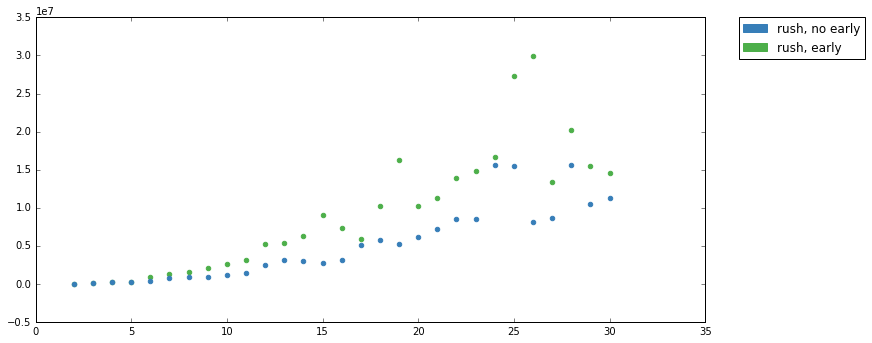

In [691]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(rush_early_1toc["top"], rush_early_1toc["cir"]/rush_early_1toc["tok"], color="#4daf4a")
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["cir"]/rush_noearly_1toc["tok"], color="#377eb8")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[blue_patch, green_patch])
plt.plot()

[]

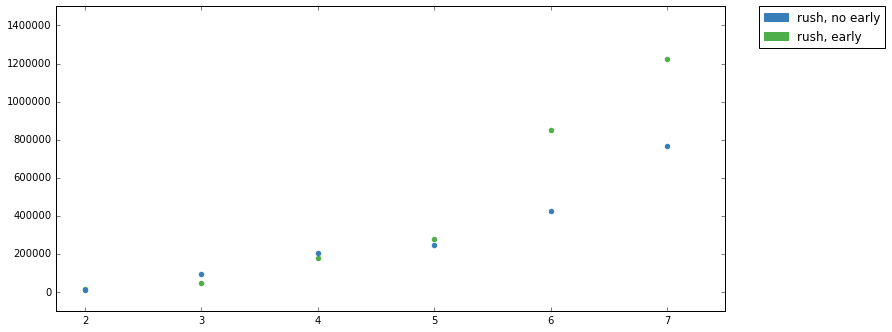

In [692]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(rush_early_1toc["top"], rush_early_1toc["cir"]/rush_early_1toc["tok"], color="#4daf4a")
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["cir"]/rush_noearly_1toc["tok"], color="#377eb8")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[blue_patch, green_patch])
plt.ylim(ymax=1500000, ymin = -100000)
plt.xlim(xmax=7.5, xmin = 1.75)
plt.plot()

5 токенов:

[]

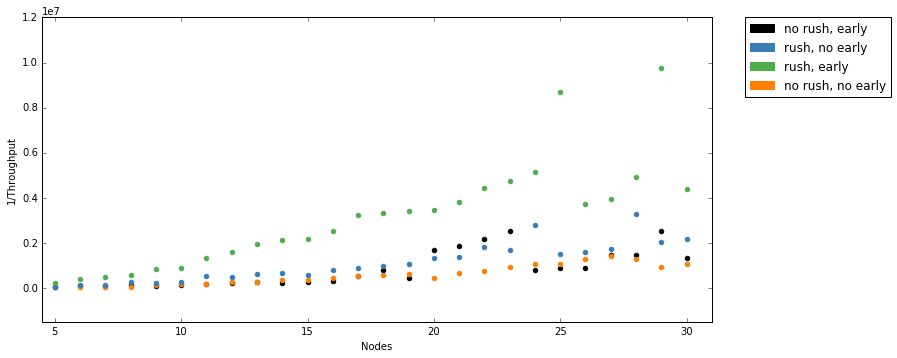

In [693]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("1/Throughput")
plt.scatter(norush_early_5toc["top"], norush_early_5toc["cir"]/norush_early_5toc["tok"], color="black")
plt.scatter(rush_early_5toc["top"], rush_early_5toc["cir"]/rush_early_5toc["tok"], color="#4daf4a")
plt.scatter(norush_noearly_5toc["top"], norush_noearly_5toc["cir"]/norush_noearly_5toc["tok"], color="#ff7f00")
plt.scatter(rush_noearly_5toc["top"], rush_noearly_5toc["cir"]/rush_noearly_5toc["tok"], color="#377eb8")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.ylim(ymax=12000000, ymin = -1500000)
plt.xlim(xmax=31, xmin = 4.5)

plt.plot()

15 токенов:

[]

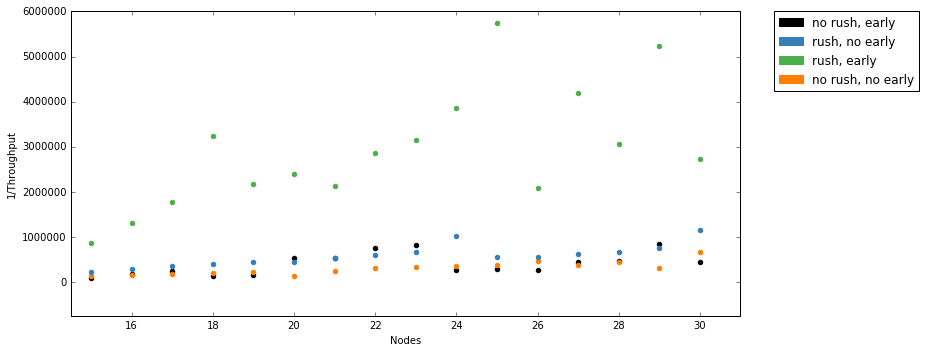

In [694]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("1/Throughput")
plt.scatter(norush_early_15toc["top"], norush_early_15toc["cir"]/norush_early_15toc["tok"], color="black")
plt.scatter(rush_early_15toc["top"], rush_early_15toc["cir"]/rush_early_15toc["tok"], color="#4daf4a")
plt.scatter(norush_noearly_15toc["top"], norush_noearly_15toc["cir"]/norush_noearly_15toc["tok"], color="#ff7f00")
plt.scatter(rush_noearly_15toc["top"], rush_noearly_15toc["cir"]/rush_noearly_15toc["tok"], color="#377eb8")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.ylim(ymax=6000000, ymin = -750000)
plt.xlim(xmax=31, xmin = 14.5)

plt.plot()

Как видно из графиков для случаев 5 и 15 токенов, при увеличении количества токенов throughtput растёт, однако общая картина остаётся такой же, как и в случае одного токена.

## 2. Latency(topology_size)

[]

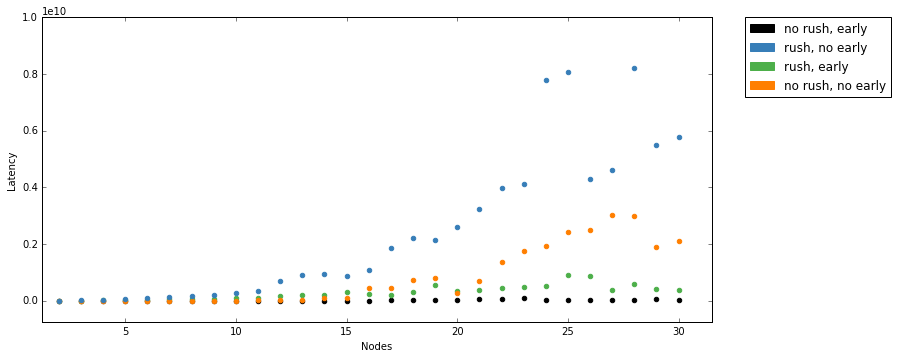

In [695]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_1toc["top"], norush_early_1toc["rec"], color="black")
plt.scatter(rush_early_1toc["top"], rush_early_1toc["rec"], color="#4daf4a")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["rec"], color="#ff7f00")
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["rec"], color="#377eb8")
plt.xlabel("Nodes")
plt.ylabel("Latency")

plt.ylim(ymax=10000000000, ymin = -750000000)
plt.xlim(xmax=31.5, xmin = 1.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.plot()

Как видно из графиков, на малом количестве нод все режимы обеспечивают примерно одинаковую latency, однако при увеличении количества нод худшая latency у режима с загруженной сетью и без раннего освобождения токена, а лучшую latency показывают режимы с ранним освобождением токена.

[]

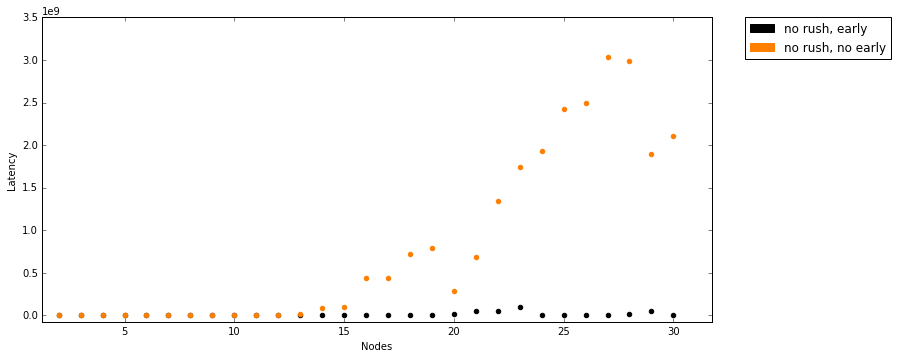

In [696]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("Latency")
plt.scatter(norush_early_1toc["top"], norush_early_1toc["rec"]/norush_early_1toc["tok"], color="black")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["rec"]/norush_noearly_1toc["tok"] , color="#ff7f00")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[ red_patch, yellow_patch])
plt.ylim(ymax=3500000000, ymin = -75000000)
plt.xlim(xmax=31.75, xmin = 1.25)
plt.plot()

[]

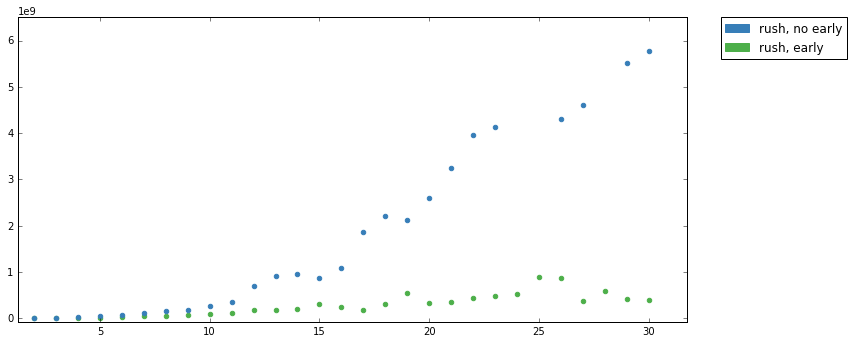

In [697]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(rush_early_1toc["top"], rush_early_1toc["rec"]/rush_early_1toc["tok"], color="#4daf4a")

plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["rec"]/rush_noearly_1toc["tok"], color="#377eb8")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[ blue_patch, green_patch])
plt.ylim(ymax=6500000000, ymin = -75000000)
plt.xlim(xmax=31.75, xmin = 1.25)

plt.plot()

5 токенов

[]

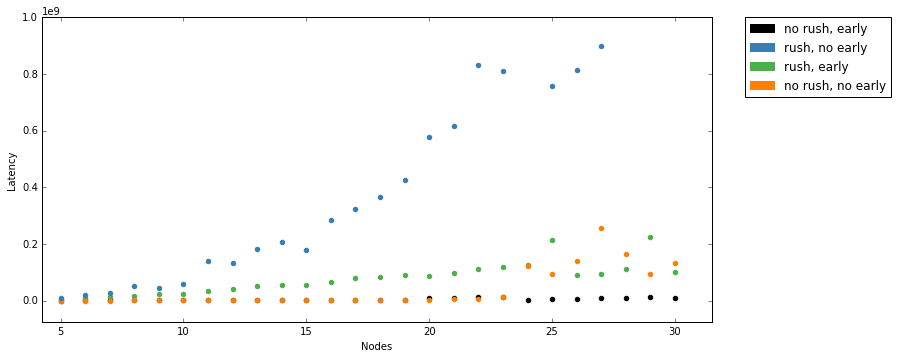

In [698]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_5toc["top"], norush_early_5toc["rec"], color="black")
plt.scatter(rush_early_5toc["top"], rush_early_5toc["rec"], color="#4daf4a")
plt.scatter(norush_noearly_5toc["top"], norush_noearly_5toc["rec"], color="#ff7f00")
plt.scatter(rush_noearly_5toc["top"], rush_noearly_5toc["rec"], color="#377eb8")
plt.xlabel("Nodes")
plt.ylabel("Latency")

plt.ylim(ymax=1000000000, ymin = -75000000)
plt.xlim(xmax=31.5, xmin = 4.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.plot()

15 токенов

[]

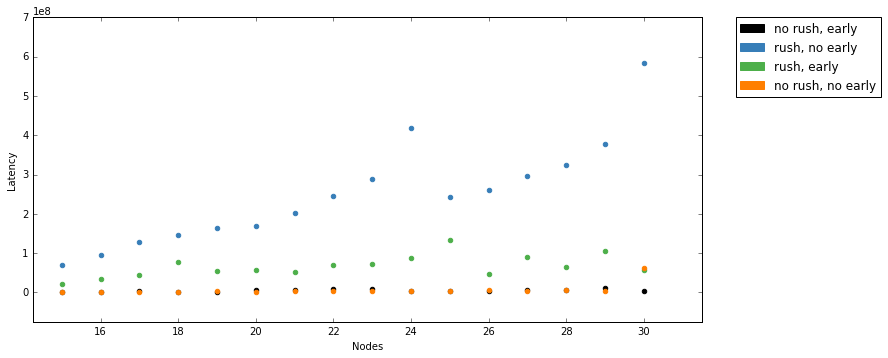

In [699]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_15toc["top"], norush_early_15toc["rec"], color="black")
plt.scatter(rush_early_15toc["top"], rush_early_15toc["rec"], color="#4daf4a")
plt.scatter(norush_noearly_15toc["top"], norush_noearly_15toc["rec"], color="#ff7f00")
plt.scatter(rush_noearly_15toc["top"], rush_noearly_15toc["rec"], color="#377eb8")
plt.xlabel("Nodes")
plt.ylabel("Latency")

plt.ylim(ymax=700000000, ymin = -75000000)
plt.xlim(xmax=31.5, xmin = 14.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.plot()

Как видим, с увеличением количества токенов latency падает, однако худшее значение latency среди режимов по-прежнему в режиме rush-no early
Однако, теперь в лидеры по latency выбились режимы с ненагруженной сетью, причем после некоторого порога количества нод, при увеличении числа нод latency режима с ранним освобождением растёт существенно медленнее, чем latency стандартного no rush-no early режима.

## 3. Throughput(tokens)

[]

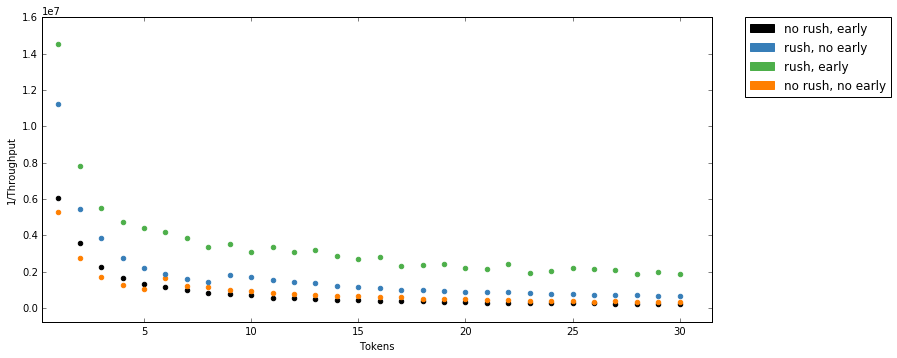

In [700]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_30nodes["tok"], norush_early_30nodes["cir"]/norush_early_30nodes["tok"], color="black")
plt.scatter(rush_early_30nodes["tok"], rush_early_30nodes["cir"]/rush_early_30nodes["tok"], color="#4daf4a")
plt.scatter(norush_noearly_30nodes["tok"], norush_noearly_30nodes["cir"]/norush_noearly_30nodes["tok"], color="#ff7f00")
plt.scatter(rush_noearly_30nodes["tok"], rush_noearly_30nodes["cir"]/rush_noearly_30nodes["tok"], color="#377eb8")
plt.xlabel("Tokens")
plt.ylabel("1/Throughput")
plt.ylim(ymax=16000000, ymin = -750000)
plt.xlim(xmax=31.5, xmin = 0.25)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

[]

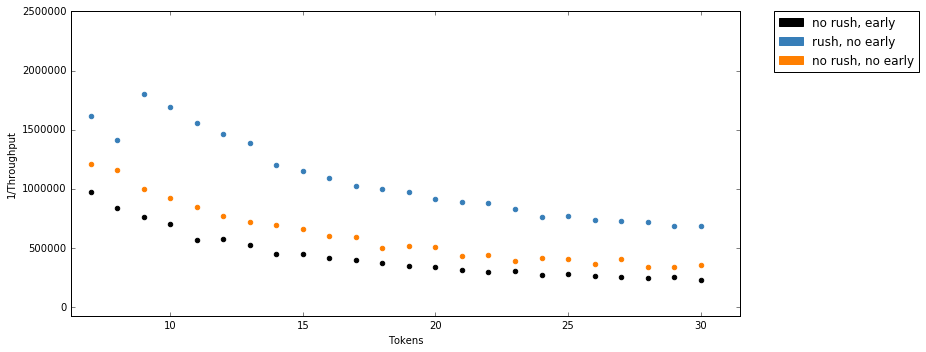

In [701]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_30nodes["tok"], norush_early_30nodes["cir"]/norush_early_30nodes["tok"], color="black")
plt.scatter(norush_noearly_30nodes["tok"], norush_noearly_30nodes["cir"]/norush_noearly_30nodes["tok"], color="#ff7f00")
plt.scatter(rush_noearly_30nodes["tok"], rush_noearly_30nodes["cir"]/rush_noearly_30nodes["tok"], color="#377eb8")
plt.xlabel("Tokens")
plt.ylabel("1/Throughput")

plt.ylim(ymax=2500000, ymin = -75000)
plt.xlim(xmax=31.5, xmin = 6.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, yellow_patch])
# plt.ylim(ymax=2000000, ymin = -50000)

plt.plot()

Как видим, лучший throughput у ненагруженной сети с ранним освобождением токена, худший - у нагруженной сети с ранним освобождением токена. Видимо, причина в образующихся локальных заторах, как предполагалось выше.

15 нод

[]

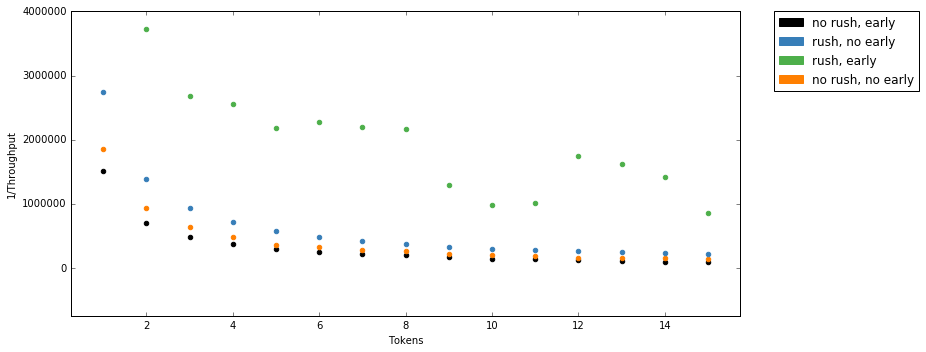

In [702]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_15nodes["tok"], norush_early_15nodes["cir"]/norush_early_15nodes["tok"], color="black")
plt.scatter(rush_early_15nodes["tok"], rush_early_15nodes["cir"]/rush_early_15nodes["tok"], color="#4daf4a")
plt.scatter(norush_noearly_15nodes["tok"], norush_noearly_15nodes["cir"]/norush_noearly_15nodes["tok"], color="#ff7f00")
plt.scatter(rush_noearly_15nodes["tok"], rush_noearly_15nodes["cir"]/rush_noearly_15nodes["tok"], color="#377eb8")
plt.xlabel("Tokens")
plt.ylabel("1/Throughput")
plt.ylim(ymax=4000000, ymin = -750000)
plt.xlim(xmax=15.75, xmin = 0.25)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

5 нод

[]

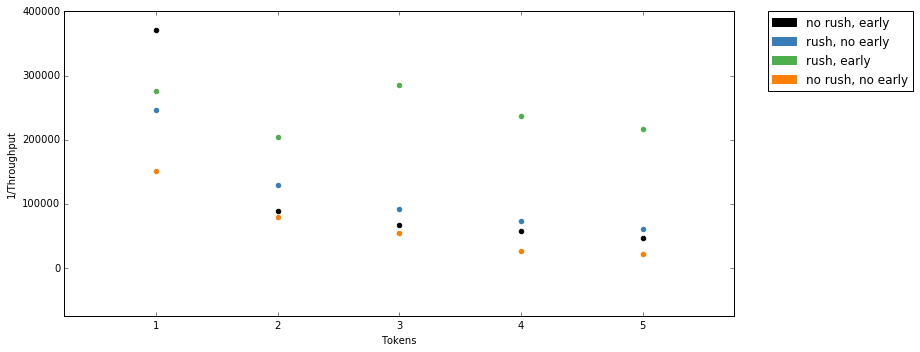

In [703]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_5nodes["tok"], norush_early_5nodes["cir"]/norush_early_5nodes["tok"], color="black")
plt.scatter(rush_early_5nodes["tok"], rush_early_5nodes["cir"]/rush_early_5nodes["tok"], color="#4daf4a")
plt.scatter(norush_noearly_5nodes["tok"], norush_noearly_5nodes["cir"]/norush_noearly_5nodes["tok"], color="#ff7f00")
plt.scatter(rush_noearly_5nodes["tok"], rush_noearly_5nodes["cir"]/rush_noearly_5nodes["tok"], color="#377eb8")
plt.xlabel("Tokens")
plt.ylabel("1/Throughput")
plt.ylim(ymax=400000, ymin = -75000)
plt.xlim(xmax=5.75, xmin = 0.25)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

Как видим, для 15 нод картина сохраняется, однако для 5 нод у стратегии no rush-early throughtput хуже, чем у no rush-no early. Это можно объяснить банальным недостатком статистики - в топологию из 5 нод не помещалось более 5 токенов.

## 4. Latency(tokens)

[]

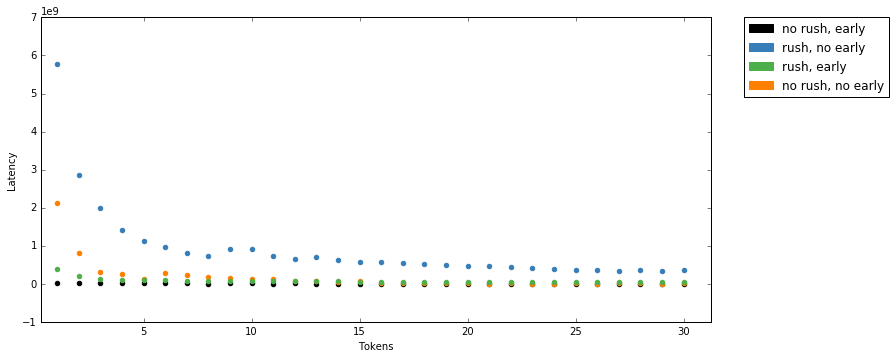

In [704]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_30nodes["tok"], norush_early_30nodes["rec"], color="black")
plt.scatter(norush_noearly_30nodes["tok"], norush_noearly_30nodes["rec"], color="#ff7f00")
plt.scatter(rush_early_30nodes["tok"], rush_early_30nodes["rec"], color="#4daf4a")
plt.scatter(rush_noearly_30nodes["tok"], rush_noearly_30nodes["rec"], color="#377eb8")
# plt.ylim(ymax=150000000, ymin = -12500000)
plt.xlim(xmax=31.25, xmin = 0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

[]

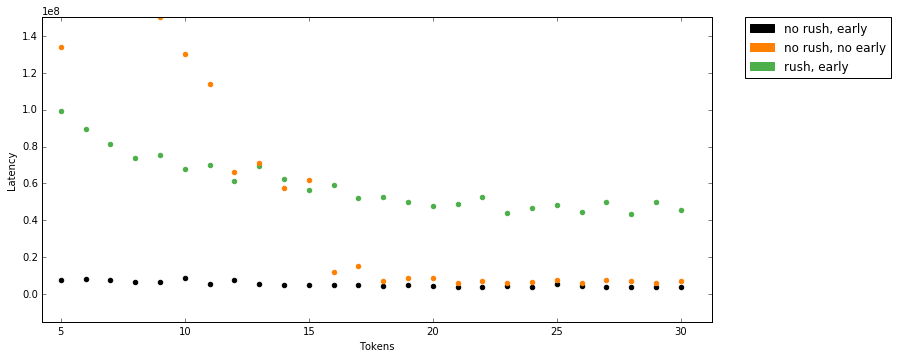

In [705]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_30nodes["tok"], norush_early_30nodes["rec"], color="black")
plt.scatter(rush_early_30nodes["tok"], rush_early_30nodes["rec"], color="#4daf4a")
plt.scatter(norush_noearly_30nodes["tok"], norush_noearly_30nodes["rec"], color="#ff7f00")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, yellow_patch, green_patch])
plt.ylim(ymax=150000000, ymin = -15000000)
plt.xlim(xmax=31.25, xmin =4.25)
plt.plot()

Как видно из графиков, худшая latency у режима rush-no early, лучшая - у режима no rush-early.
При большом количестве токенов latency режима no rush-no early становится практически равной её значению в режиме no rush-early.

15 нод

[]

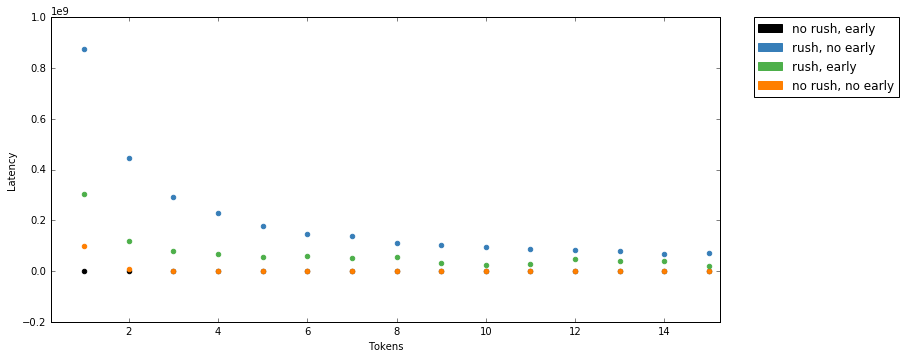

In [706]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_15nodes["tok"], norush_early_15nodes["rec"], color="black")
plt.scatter(norush_noearly_15nodes["tok"], norush_noearly_15nodes["rec"], color="#ff7f00")
plt.scatter(rush_early_15nodes["tok"], rush_early_15nodes["rec"], color="#4daf4a")
plt.scatter(rush_noearly_15nodes["tok"], rush_noearly_15nodes["rec"], color="#377eb8")
# plt.ylim(ymax=150000000, ymin = -12500000)
plt.xlim(xmax = 15.25, xmin = 0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

[]

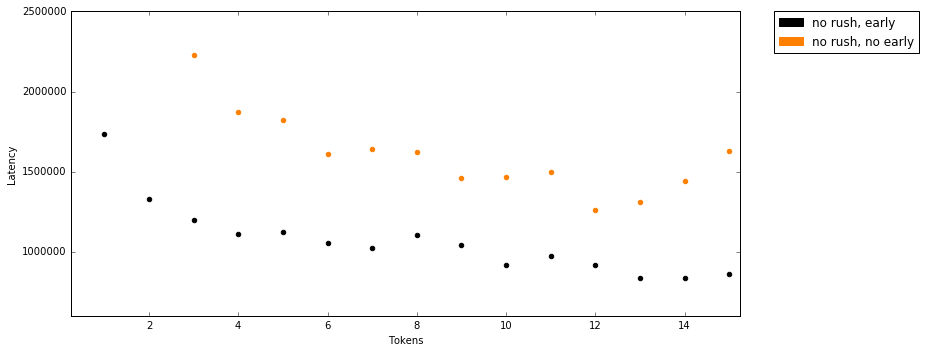

In [707]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_15nodes["tok"], norush_early_15nodes["rec"], color="black")
plt.scatter(norush_noearly_15nodes["tok"], norush_noearly_15nodes["rec"], color="#ff7f00")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, yellow_patch])
plt.ylim(ymax=2500000, ymin = 600000)
plt.xlim(xmax = 15.25, xmin = 0.25)
plt.plot()

5 нод

[]

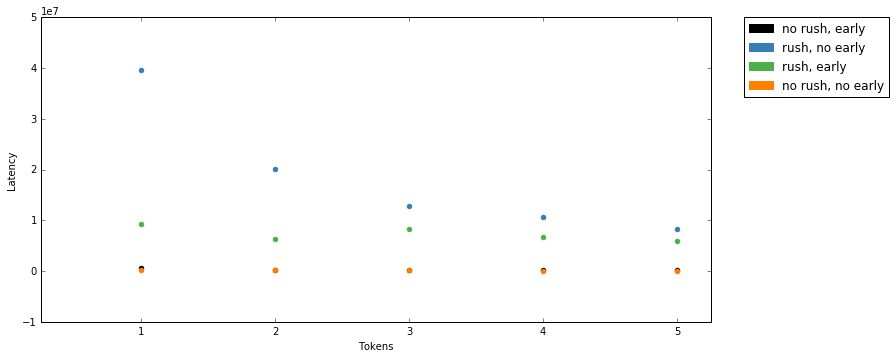

In [708]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_5nodes["tok"], norush_early_5nodes["rec"], color="black")
plt.scatter(norush_noearly_5nodes["tok"], norush_noearly_5nodes["rec"], color="#ff7f00")
plt.scatter(rush_early_5nodes["tok"], rush_early_5nodes["rec"], color="#4daf4a")
plt.scatter(rush_noearly_5nodes["tok"], rush_noearly_5nodes["rec"], color="#377eb8")
# plt.ylim(ymax=150000000, ymin = -12500000)
plt.xlim(xmax = 5.25, xmin = 0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

[]

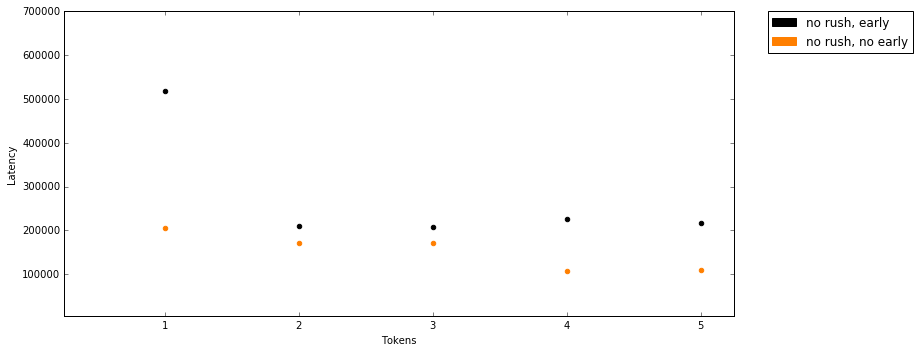

In [709]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_5nodes["tok"], norush_early_5nodes["rec"], color="black")
plt.scatter(norush_noearly_5nodes["tok"], norush_noearly_5nodes["rec"], color="#ff7f00")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, yellow_patch])
plt.ylim(ymax=700000, ymin = 5000)
plt.xlim(xmax = 5.25, xmin = 0.25)
plt.plot()

В целом при различных количествах нод лучшую latency демонстрирует режим no rush-early. Победу режима no rush-no early на 5-ти нодах можно списать на недостаток статистики - задача поставлена таким образом, что на 5 нодах можно провести не более 5 измерений.